# Eigenvalues and eigenvectors of stiffness matrices

In [1]:
from sympy.utilities.codegen import codegen
from sympy import *
from sympy import init_printing

In [2]:
init_printing()

In [3]:
r, s, t, x, y, z = symbols('r s t x y z') 
k, m, n = symbols('k m n', integer=True)
rho, nu, E = symbols('rho, nu, E')

## Predefinition

The constitutive model tensor in Voigt notation (plane stress) is
$$C = \frac{E}{(1 - \nu^2)}
\begin{pmatrix}
1 & \nu & 0\\
\nu & 1 & 0\\
0 & 0 & \frac{1 - \nu}{2)}
\end{pmatrix}$$


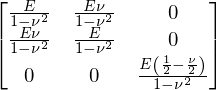

In [4]:
K_factor = E/(1 - nu**2)
C = K_factor * Matrix([
        [1, nu, 0],
        [nu, 1, 0],
         [0, 0, (1 - nu)/2]])

C

## Interpolation functions

The shape functions are

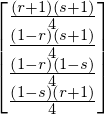

In [5]:
N = S(1)/4*Matrix([(1 + r)*(1 + s),
         (1 - r)*(1 + s),
         (1 - r)*(1 - s),
         (1 + r)*(1 - s)])
N

Thus, the interpolation matrix renders

## Derivatives interpolation matrix

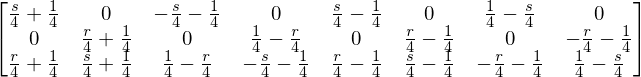

In [6]:
dHdr = zeros(2,4)
for i in range(4):
    dHdr[0,i] = diff(N[i],r)
    dHdr[1,i] = diff(N[i],s)

jaco = eye(2)  # Jacobian matrix, identity for now
dHdx = jaco*dHdr

B = zeros(3,8)
for i in range(4):
    B[0, 2*i] = dHdx[0, i]
    B[1, 2*i+1] = dHdx[1, i]
    B[2, 2*i] = dHdx[1, i]
    B[2, 2*i+1] = dHdx[0, i]
    
B

Being the stiffness matrix integrand
$$K_\text{int} = B^T C B$$

In [7]:
K_int = B.T*C*B

## Analytic integration

The stiffness matrix is obtained integrating the product of the interpolator-derivatives (displacement-to-strains) matrix with the constitutive tensor and itself, i.e.
$$\begin{align*}
K &= \int\limits_{-1}^{1}\int\limits_{-1}^{1} K_\text{int} dr\, ds\\
 &= \int\limits_{-1}^{1}\int\limits_{-1}^{1} B^T C\, B\, dr\, ds \enspace .
\end{align*}$$

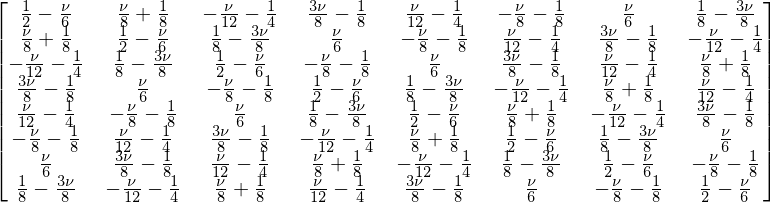

In [8]:
K = zeros(8,8)
for i in range(8):
    for j in range(8):
        K[i,j] = integrate(K_int[i,j], (r,-1,1), (s,-1,1))

simplify(K/K_factor)

We can check some numerical vales for $E=1$ Pa and $\nu=1/3$

In [9]:
K_num = K.subs([(E, 1), (nu, S(1)/3)])

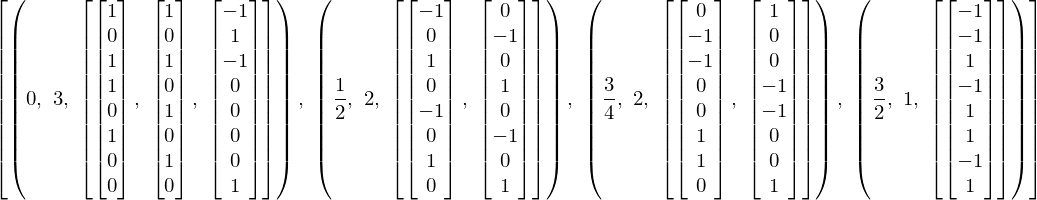

In [10]:
K_num.eigenvects()